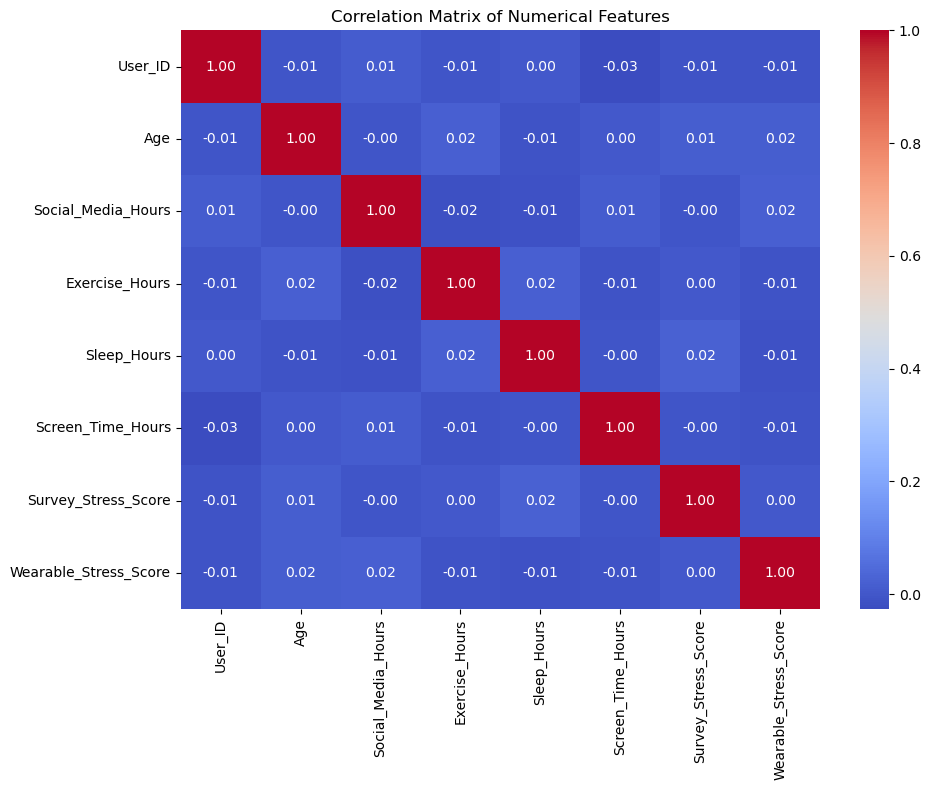

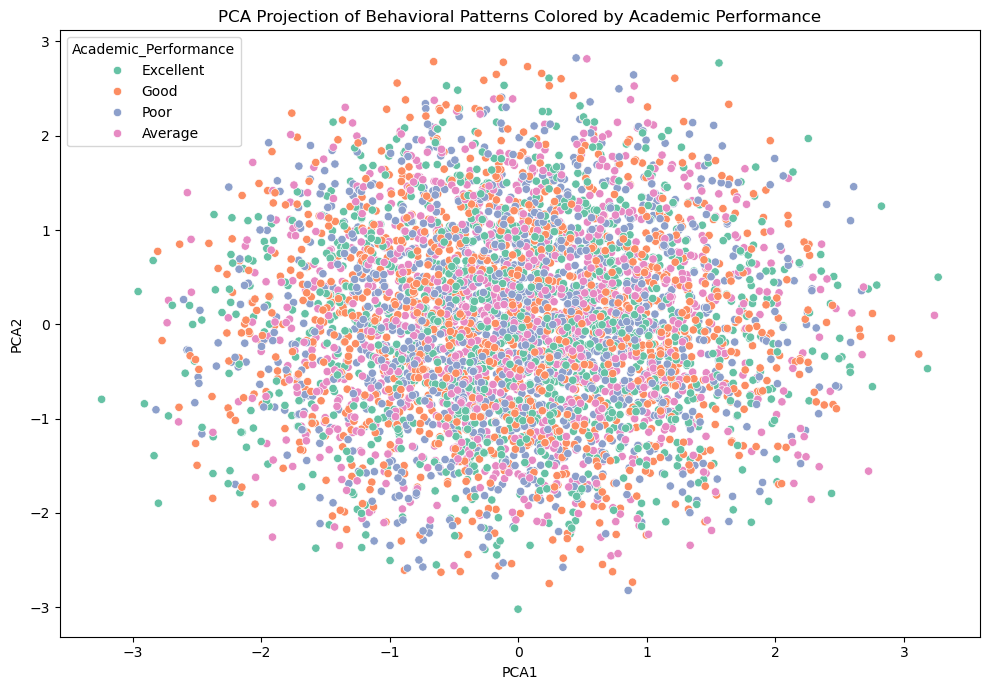


Classification Report:
               precision    recall  f1-score   support

     Average       0.23      0.28      0.25       229
   Excellent       0.26      0.21      0.24       259
        Good       0.28      0.28      0.28       263
        Poor       0.25      0.26      0.26       249

    accuracy                           0.26      1000
   macro avg       0.26      0.26      0.26      1000
weighted avg       0.26      0.26      0.26      1000


Confusion Matrix:
 [[63 47 58 61]
 [75 55 65 64]
 [62 60 74 67]
 [70 47 67 65]]


In [2]:
# Mental Health Analysis: Correlation, PCA Clustering, and Predictive Modeling

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load data
data = pd.read_csv("mental_health_analysis.csv")

# --- Correlation Matrix ---
numerical_cols = data.select_dtypes(include=["int64", "float64"])
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

# --- PCA Clustering ---
features = ["Social_Media_Hours", "Exercise_Hours", "Sleep_Hours", 
            "Screen_Time_Hours", "Survey_Stress_Score", "Wearable_Stress_Score"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

data["PCA1"] = X_pca[:, 0]
data["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x="PCA1", y="PCA2", hue="Academic_Performance", palette="Set2")
plt.title("PCA Projection of Behavioral Patterns Colored by Academic Performance")
plt.tight_layout()
plt.show()

# --- Predictive Modeling ---
X = data[features]
y = data["Academic_Performance"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)
